In [0]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import collections
import pandas as pd

In [2]:
# Load Fashion MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


The training dataset has 60000 images of size (28,28) with each pixel as a value from 0 to 255 (0 for white and 255 for black).

The testing dataset has 10000 images with labels for test.

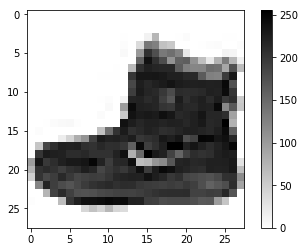

In [3]:
# Show the first image
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

Each label in dataset represents a class of fashion item:<br>

| Label |    Class    |
|:-----:|:-----------:|
|   0   | T-shirt/top |
|   1   |   Trouser   |
|   2   |   Pullover  |
|   3   |    Dress    |
|   4   |     Coat    |
|   5   |    Sandal   |
|   6   |    Shirt    |
|   7   |   Sneaker   |
|   8   |     Bag     |
|   9   |  Ankle boot |

In [0]:
# Add label names
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

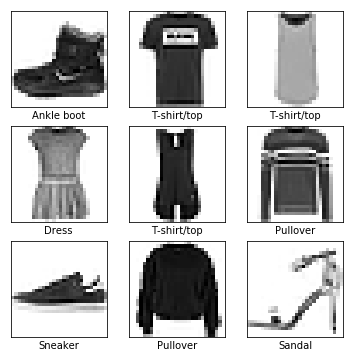

In [5]:
# Display first 9 images with labels
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[y_train[i]])
plt.show()

In [6]:
# Count occurrence of each class in training set
train_counter = collections.Counter(y_train)
for key in train_counter.keys():
    print(label_names[key] + ': ' + str(train_counter[key]))

Ankle boot: 6000
T-shirt/top: 6000
Dress: 6000
Pullover: 6000
Sneaker: 6000
Sandal: 6000
Trouser: 6000
Shirt: 6000
Coat: 6000
Bag: 6000


Each feature has a value in the range of 0 to 255, which is too wide. Therefore, normalization is necessary to scale the data dimensions to make them approximately the same scale.<br>
<br>
In this case, I scaled these values to a range of 0 to 1 by dividing them by 255.<br>
<br>
In addition, since I will start with classification with Machine Learning methods, images need to be flattened to meet the requirement of input into machine learning models.

In [7]:
# Feature scaling: divide features by 255 to get a range of 0 to 1
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

# Flatten training and test data
x_train_scaled_reshaped = np.reshape(x_train_scaled, 
                                     (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test_scaled_reshaped = np.reshape(x_test_scaled, 
                                     (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(x_train_scaled_reshaped.shape)
print(x_test_scaled_reshaped.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


### Classification with Machine Learning
<br>
I will start from supervised machine learning methods as this is a classification problem. <br>
<br>
Below are 3 classifiers that I will try:<br>
1. SGD Classifier <br>  2. Decision Tree Classifier <br>  3. Random Forest Classifier

In [0]:
# Import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [9]:
# SGD classifier
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=217)
sgd.fit(x_train_scaled_reshaped, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=217, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
# Prediction on training set
y_train_predict = sgd.predict(x_train_scaled_reshaped)

# Calculate the accuracy score
sgd_acc = accuracy_score(y_train, y_train_predict)
sgd_precision = precision_score(y_train, y_train_predict, average='weighted')
sgd_recall = recall_score(y_train, y_train_predict, average='weighted')
sgd_f1 = f1_score(y_train, y_train_predict, average='weighted')

print('SGD accuracy: ', sgd_acc)
print('SGD precision: ', sgd_precision)
print('SGD recall: ', sgd_recall)
print('SGD f1: ', sgd_f1)

SGD accuracy:  0.8643833333333333
SGD precision:  0.8654810285464405
SGD recall:  0.8643833333333333
SGD f1:  0.8646701656929745


In [11]:
# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

sgd_cv_acc = cross_val_score(sgd, x_train_scaled_reshaped, y_train, cv=5, scoring="accuracy").mean() 
y_train_cv_pred = cross_val_predict(sgd, x_train_scaled_reshaped, y_train, cv=5)

sgd_cv_precision = precision_score(y_train, y_train_cv_pred, average='weighted')
sgd_cv_recall = recall_score(y_train, y_train_cv_pred, average='weighted')
sgd_cv_f1 = f1_score(y_train, y_train_cv_pred, average='weighted')

print("SGD CV accuracy: ", sgd_cv_acc)
print("SGD CV precision: ", sgd_cv_precision)
print("SGD CV recall: ", sgd_cv_recall)
print("SGD CV f1: ", sgd_cv_f1)

SGD CV accuracy:  0.8385999999999999
SGD CV precision:  0.8381626837570993
SGD CV recall:  0.8386
SGD CV f1:  0.8368564757144427


In [0]:
# Save scores
model_scores = {'sgd': {'accuracy': sgd_acc, 'precision': sgd_precision, 
                        'recall': sgd_recall, 'f1': sgd_f1,
                       'cv accuracy': sgd_cv_acc, 'cv precision': sgd_cv_precision, 
                        'cv recall': sgd_cv_recall, 'cv f1': sgd_cv_f1}}


In [13]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=217)
dt.fit(x_train_scaled_reshaped, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=217, splitter='best')

In [14]:
# Prediction on training set
y_train_predict = dt.predict(x_train_scaled_reshaped)

# Calculate the accuracy score
dt_acc = accuracy_score(y_train, y_train_predict)
dt_precision = precision_score(y_train, y_train_predict, average='weighted')
dt_recall = recall_score(y_train, y_train_predict, average='weighted')
dt_f1 = f1_score(y_train, y_train_predict, average='weighted')

print('dt accuracy: ', dt_acc)
print('dt precision: ', dt_precision)
print('dt recall: ', dt_recall)
print('dt f1: ', dt_f1)

dt accuracy:  1.0
dt precision:  1.0
dt recall:  1.0
dt f1:  1.0


In [15]:
# Cross validation
dt_cv_acc = cross_val_score(dt, x_train_scaled_reshaped, y_train, cv=5, scoring="accuracy").mean() 
y_train_cv_pred = cross_val_predict(dt, x_train_scaled_reshaped, y_train, cv=5)

dt_cv_precision = precision_score(y_train, y_train_cv_pred, average='weighted')
dt_cv_recall = recall_score(y_train, y_train_cv_pred, average='weighted')
dt_cv_f1 = f1_score(y_train, y_train_cv_pred, average='weighted')

print("dt CV accuracy: ", dt_cv_acc)
print("dt CV precision: ", dt_cv_precision)
print("dt CV recall: ", dt_cv_recall)
print("dt CV f1: ", dt_cv_f1)

dt CV accuracy:  0.79605
dt CV precision:  0.796513401611978
dt CV recall:  0.79605
dt CV f1:  0.7962626718908491


In [0]:
# Save scores
model_scores['dt'] = {'accuracy': dt_acc, 'precision': dt_precision, 
                        'recall': dt_recall, 'f1': dt_f1,
                       'cv accuracy': dt_cv_acc, 'cv precision': dt_cv_precision, 
                        'cv recall': dt_cv_recall, 'cv f1': dt_cv_f1}

In [17]:
# Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=217)
rf.fit(x_train_scaled_reshaped, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=217,
                       verbose=0, warm_start=False)

In [18]:
# Prediction on training set
y_train_predict = rf.predict(x_train_scaled_reshaped)

# Calculate the accuracy score
rf_acc = accuracy_score(y_train, y_train_predict)
rf_precision = precision_score(y_train, y_train_predict, average='weighted')
rf_recall = recall_score(y_train, y_train_predict, average='weighted')
rf_f1 = f1_score(y_train, y_train_predict, average='weighted')

print('RF accuracy: ', rf_acc)
print('RF precision: ', rf_precision)
print('RF recall: ', rf_recall)
print('RF f1: ', rf_f1)

RF accuracy:  0.9952666666666666
RF precision:  0.9952857992970969
RF recall:  0.9952666666666666
RF f1:  0.9952589930310555


In [19]:
# Cross validation
rf_cv_acc = cross_val_score(rf, x_train_scaled_reshaped, y_train, cv=5, scoring="accuracy").mean() 
y_train_cv_pred = cross_val_predict(rf, x_train_scaled_reshaped, y_train, cv=5)

rf_cv_precision = precision_score(y_train, y_train_cv_pred, average='weighted')
rf_cv_recall = recall_score(y_train, y_train_cv_pred, average='weighted')
rf_cv_f1 = f1_score(y_train, y_train_cv_pred, average='weighted')

print("rf CV accuracy: ", rf_cv_acc)
print("rf CV precision: ", rf_cv_precision)
print("rf CV recall: ", rf_cv_recall)
print("rf CV f1: ", rf_cv_f1)

rf CV accuracy:  0.8593333333333334
rf CV precision:  0.8584367315955799
rf CV recall:  0.8593333333333333
rf CV f1:  0.8573226294071724


In [0]:
# Save scores
model_scores['rf'] ={'accuracy': rf_acc, 'precision': rf_precision, 
                        'recall': rf_recall, 'f1': rf_f1,
                       'cv accuracy': rf_cv_acc, 'cv precision': rf_cv_precision, 
                        'cv recall': rf_cv_recall, 'cv f1': rf_cv_f1}

##### Evaluate:

According to the model scores displayed below, we can see that Decision Trees Classifier and Random Forest Classifier both have a high accuracy on training data, Random Forest Classifier does a better work on cross-validation score.<br>
<br>
Therefore, I will continue to fine tuning the Random Forest Model.

In [21]:
score_order = ['accuracy', 'precision', 'recall', 'f1', 
               'cv accuracy', 'cv precision', 'cv recall', 'cv f1']
pd.DataFrame(model_scores).transpose()[score_order]

,accuracy,precision,recall,f1,cv accuracy,cv precision,cv recall,cv f1
sgd,0.864383,0.865481,0.864383,0.864670,0.838600,0.838163,0.838600,0.836856
dt,1.000000,1.000000,1.000000,1.000000,0.796050,0.796513,0.796050,0.796263
rf,0.995267,0.995286,0.995267,0.995259,0.859333,0.858437,0.859333,0.857323


Runing model on a dataset that has 784 features can be very time consuming, in order to speed up the model fitting, I will try to reduce dimension by Principal Component Analysis(PCA).<br>
<br>
Below is the code to compare number of features left and quality of image after PCA by setting different minimum amount of variance that needs to be explained(90%, 95%, 99%).

n_components = 0.9, 84 (11.0%)features left.


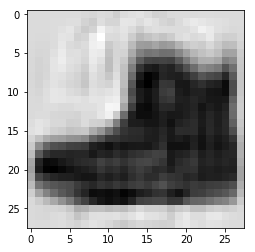

n_components = 0.95, 187 (24.0%)features left.


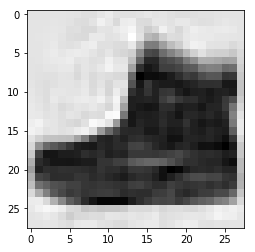

n_components = 0.99, 459 (59.0%)features left.


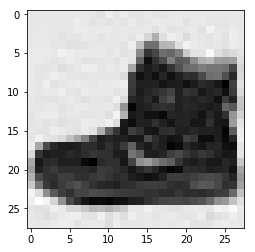

In [22]:
# Tuning Random Forest Model
# Dimension Reduction using PCA
from sklearn.decomposition import PCA

n_components_grid = [0.9, 0.95, 0.99]
for n_components in n_components_grid:
    pca = PCA(n_components=n_components)
    X_train_reduced = pca.fit_transform(x_train_scaled_reshaped)
    print("n_components = {}, {} ({}%)features left."
          .format(n_components, pca.n_components_, round(100*pca.n_components_/784)))
    
    # plot a sample image
    sample = pca.inverse_transform(X_train_reduced[0])
    sample = sample.reshape(28,28)
    plt.imshow(sample, cmap=plt.cm.binary)
    plt.show()

We can see that under n_components=0.9 and 0.95 we lose ~90% and ~75% features, the quality of image is poor, so I will go with n_components=0.99.

In [0]:
# Select n_components = 0.99
pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(x_train_scaled_reshaped)

In [24]:
# perform GridSearchCV to tune the RF model
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [50,100], 'max_depth': [10, 20, 50]},    
]

rf_grid_search = RandomForestClassifier(random_state=217)
grid_search = GridSearchCV(rf_grid_search, param_grid, cv=3,
                           scoring='accuracy')
grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=217,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[

In [25]:
grid_search.best_params_

{'max_depth': 50, 'n_estimators': 100}

In [27]:
cv_result = grid_search.cv_results_
for acc, params in zip(cv_result["mean_test_score"], cv_result["params"]):
    print(acc, params)

0.8165 {'max_depth': 10, 'n_estimators': 50}
0.8220666666666666 {'max_depth': 10, 'n_estimators': 100}
0.841 {'max_depth': 20, 'n_estimators': 50}
0.8495833333333334 {'max_depth': 20, 'n_estimators': 100}
0.8408833333333333 {'max_depth': 50, 'n_estimators': 50}
0.8519166666666667 {'max_depth': 50, 'n_estimators': 100}


In [28]:
# Calculate the accuracy score 
best_model = grid_search.best_estimator_

y_train_predict = best_model.predict(X_train_reduced)

# Calculate the accuracy score
best_rf_acc = accuracy_score(y_train, y_train_predict)
best_rf_precision = precision_score(y_train, y_train_predict, average='weighted')
best_rf_recall = recall_score(y_train, y_train_predict, average='weighted')
best_rf_f1 = f1_score(y_train, y_train_predict, average='weighted')

print('best_rf accuracy: ', best_rf_acc)
print('best_rf precision: ', best_rf_precision)
print('best_rf recall: ', best_rf_recall)
print('best_rf f1: ', best_rf_f1)

best_rf accuracy:  1.0
best_rf precision:  1.0
best_rf recall:  1.0
best_rf f1:  1.0


In [0]:
# Evaluate best model on test set
X_test_reduced = pca.transform(x_test_scaled_reshaped)
y_test_predict = best_model.predict(X_test_reduced)

In [30]:
# Calculate the accuracy score on test set
best_rf_acc = accuracy_score(y_test, y_test_predict)
best_rf_precision = precision_score(y_test, y_test_predict, average='weighted')
best_rf_recall = recall_score(y_test, y_test_predict, average='weighted')
best_rf_f1 = f1_score(y_test, y_test_predict, average='weighted')

print('best_rf accuracy: ', best_rf_acc)
print('best_rf precision: ', best_rf_precision)
print('best_rf recall: ', best_rf_recall)
print('best_rf f1: ', best_rf_f1)

best_rf accuracy:  0.8492
best_rf precision:  0.8471963084203504
best_rf recall:  0.8492
best_rf f1:  0.8463019485665407


According to the results above, Random Forest performs the better than SGD classifier and Decision Trees on Fashion MNIST classification. <br>
<br>
In order to get better scores from RF models, we may need to increase number of estimators and max_depth, and there is overfitting problem in the model. <br>
<br>
Therefore let's try out deep learning method: convolutional neural networks.

### Classification with Deep Learning
#### Convolutional Neural Networks

The first step is to prepare the data.<br>
<br>
We need a train set to train the model, a validation set to validate, and a test set to test the model performance on unseen data. In this case, we can split the train set into a train set(80%) and a validation set(20%).<br>
<br>
In addition, the input data should be reshaped to the shape that the network expects, and labels need to be converted to one-hot vector.

In [31]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 1. reshape x_train_scaled before spliting
x_train_reshaped = x_train_scaled.reshape(x_train.shape[0], 28, 28, 1)

# 2. convert y_train to one-hot vector
y_train_cat = to_categorical(y_train)

# 3. split x_train_scaled into a train set(80%) and a validation set(20%)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(x_train_reshaped, y_train_cat, test_size=0.2, random_state=217)

# 4. prepare the test data in the same way
X_test_reshaped = x_test_scaled.reshape(x_test.shape[0], 28, 28, 1)
y_test_cat = to_categorical(y_test)

Using TensorFlow backend.


In [0]:
# Import libraries for CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Let's start with a 1-convolutional-layer CNN.<br>
<br>
A dropout layer is added for regularization, which is a powerful way to combat overfitting. A dropout rate of 0.5 will randomly disable 50% of the neurons in the learning phase.

In [0]:
# CNN with 1 Convolutional Layer
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.5))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

cnn1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
cnn1.fit(X_train_sub,
         y_train_sub,
         batch_size=64,
         epochs=15,
         validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 5s 97us/step - loss: 0.4641 - acc: 0.8354 - val_loss: 0.3436 - val_acc: 0.8816
Epoch 2/15
48000/48000 [==============================] - 4s 78us/step - loss: 0.3322 - acc: 0.8800 - val_loss: 0.2932 - val_acc: 0.8951
Epoch 3/15
48000/48000 [==============================] - 4s 78us/step - loss: 0.2922 - acc: 0.8928 - val_loss: 0.2737 - val_acc: 0.9009
Epoch 4/15
48000/48000 [==============================] - 4s 78us/step - loss: 0.2652 - acc: 0.9021 - val_loss: 0.2652 - val_acc: 0.9017
Epoch 5/15
48000/48000 [==============================] - 4s 77us/step - loss: 0.2445 - acc: 0.9096 - val_loss: 0.2479 - val_acc: 0.9099
Epoch 6/15
48000/48000 [==============================] - 4s 77us/step - loss: 0.2272 - acc: 0.9146 - val_loss: 0.2544 - val_acc: 0.9060
Epoch 7/15
48000/48000 [==============================] - 4s 78us/step - loss: 0.2096 - acc: 0.9217 - val_loss: 0.2347 - val_acc

In [60]:
# Evaluate the model on test set
cnn1_score = cnn1.evaluate(X_test_reshaped, y_test_cat)
print("1-layer CNN accuracy on test set: ", cnn1_score[1])

10000/10000 [==============================] - 1s 51us/step
1-layer CNN accuracy on test set:  0.9142


The accuracy of prediction on test set is higher than that of Random Forest Classifier, the model is a little bit overfitting, but still in the reasonable range.

In [0]:
# CNN with 2 convolutional layers
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn2.add(MaxPooling2D((2, 2)))
cnn2.add(Dropout(0.3))

cnn2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.3))

cnn2.add(Flatten())

cnn2.add(Dense(128, activation='relu'))
cnn2.add(Dropout(0.4))
cnn2.add(Dense(10, activation='softmax'))

cnn2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
cnn2.fit(X_train_sub,
         y_train_sub,
         batch_size=64,
         epochs=15,
         validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 5s 94us/step - loss: 0.6844 - acc: 0.7470 - val_loss: 0.4496 - val_acc: 0.8399
Epoch 2/15
48000/48000 [==============================] - 4s 85us/step - loss: 0.4614 - acc: 0.8317 - val_loss: 0.3573 - val_acc: 0.8698
Epoch 3/15
48000/48000 [==============================] - 4s 86us/step - loss: 0.4022 - acc: 0.8538 - val_loss: 0.3334 - val_acc: 0.8792
Epoch 4/15
48000/48000 [==============================] - 4s 83us/step - loss: 0.3700 - acc: 0.8650 - val_loss: 0.2998 - val_acc: 0.8895
Epoch 5/15
48000/48000 [==============================] - 4s 84us/step - loss: 0.3457 - acc: 0.8749 - val_loss: 0.2938 - val_acc: 0.8892
Epoch 6/15
48000/48000 [==============================] - 4s 83us/step - loss: 0.3322 - acc: 0.8787 - val_loss: 0.2794 - val_acc: 0.8949
Epoch 7/15
48000/48000 [==============================] - 4s 83us/step - loss: 0.3146 - acc: 0.8858 - val_loss: 0.2692 - val_acc

In [38]:
# Evaluate the model on test set
cnn2_score = cnn2.evaluate(X_test_reshaped, y_test_cat)
print("2-layer CNN accuracy on test set: ", cnn2_score[1])

10000/10000 [==============================] - 1s 50us/step
2-layer CNN accuracy on test set:  0.9074


The model score is lower than 1-layer CNN but no overfitting problem observed.

In [0]:
# CNN with 3 convolutional layers
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.5))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.5))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dense(10, activation='softmax'))

cnn3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
cnn3.fit(X_train_sub,
         y_train_sub,
         batch_size=64,
         epochs=15,
         validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 6s 132us/step - loss: 0.5636 - acc: 0.7915 - val_loss: 0.3717 - val_acc: 0.8697
Epoch 2/15
48000/48000 [==============================] - 6s 120us/step - loss: 0.3607 - acc: 0.8690 - val_loss: 0.3050 - val_acc: 0.8928
Epoch 3/15
48000/48000 [==============================] - 6s 119us/step - loss: 0.3082 - acc: 0.8864 - val_loss: 0.2625 - val_acc: 0.9064
Epoch 4/15
48000/48000 [==============================] - 6s 119us/step - loss: 0.2801 - acc: 0.8961 - val_loss: 0.2681 - val_acc: 0.9025
Epoch 5/15
48000/48000 [==============================] - 6s 121us/step - loss: 0.2595 - acc: 0.9034 - val_loss: 0.2341 - val_acc: 0.9175
Epoch 6/15
48000/48000 [==============================] - 6s 119us/step - loss: 0.2444 - acc: 0.9082 - val_loss: 0.2390 - val_acc: 0.9107
Epoch 7/15
48000/48000 [==============================] - 6s 120us/step - loss: 0.2316 - acc: 0.9135 - val_loss: 0.2250 - 

In [41]:
# Evaluate the model on test set
cnn3_score = cnn3.evaluate(X_test_reshaped, y_test_cat)
print("3-layer CNN accuracy on test set: ", cnn3_score[1])

10000/10000 [==============================] - 1s 59us/step
3-layer CNN accuracy on test set:  0.925


The accuracy of prediction on test set is higher.<br>
<br>
And the overfitting problem is acceptable.<br>
<br>
Now try to lower the dropout rate and see if we can get better performance.

In [0]:
cnn3_1 = Sequential()

cnn3_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))

cnn3_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn3_1.add(Dropout(0.2))

cnn3_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn3_1.add(Dropout(0.5))

cnn3_1.add(Flatten())

cnn3_1.add(Dense(128, activation='relu'))
cnn3_1.add(Dense(10, activation='softmax'))

cnn3_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [68]:
cnn3_1.fit(X_train_sub,
         y_train_sub,
         batch_size=64,
         epochs=15,
         validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 7s 147us/step - loss: 0.5108 - acc: 0.8145 - val_loss: 0.3430 - val_acc: 0.8764
Epoch 2/15
48000/48000 [==============================] - 6s 123us/step - loss: 0.3225 - acc: 0.8803 - val_loss: 0.2881 - val_acc: 0.8963
Epoch 3/15
48000/48000 [==============================] - 6s 122us/step - loss: 0.2803 - acc: 0.8966 - val_loss: 0.2441 - val_acc: 0.9092
Epoch 4/15
48000/48000 [==============================] - 6s 121us/step - loss: 0.2513 - acc: 0.9055 - val_loss: 0.2348 - val_acc: 0.9154
Epoch 5/15
48000/48000 [==============================] - 6s 121us/step - loss: 0.2308 - acc: 0.9142 - val_loss: 0.2207 - val_acc: 0.9212
Epoch 6/15
48000/48000 [==============================] - 6s 121us/step - loss: 0.2166 - acc: 0.9196 - val_loss: 0.2179 - val_acc: 0.9207
Epoch 7/15
48000/48000 [==============================] - 6s 121us/step - loss: 0.2023 - acc: 0.9233 - val_loss: 0.2087 - 

In [69]:
# Evaluate the model on test set
cnn3_1_score = cnn3_1.evaluate(X_test_reshaped, y_test_cat)
print("3-layer CNN accuracy on test set: ", cnn3_1_score[1])

10000/10000 [==============================] - 1s 60us/step
3-layer CNN accuracy on test set:  0.9279


The accuracy on test is 92.8%, and accuracy on training set is 94.9%, cross-validation accuracy is 93.1%. The model is a little bit overfitting but still acceptable.

Now let's check out the details on classification report.

In [0]:
# assign cnn_3_1 to best_model

best_model = cnn3_1

# get the predictions for the test data
predicted_classes = best_model.predict_classes(X_test_reshaped)

# get the indices to be plotted
correct = np.nonzero(predicted_classes==y_test)[0]
incorrect = np.nonzero(predicted_classes!=y_test)[0]

In [71]:
best_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 5, 5, 128)       

In [72]:
from sklearn.metrics import classification_report

target_names = ["Class {}: {}".format(i, label_names[i]) for i in range(10)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

                      precision    recall  f1-score   support

Class 0: T-shirt/top       0.87      0.88      0.88      1000
    Class 1: Trouser       0.99      0.99      0.99      1000
   Class 2: Pullover       0.91      0.89      0.90      1000
      Class 3: Dress       0.94      0.92      0.93      1000
       Class 4: Coat       0.88      0.91      0.90      1000
     Class 5: Sandal       0.99      0.98      0.99      1000
      Class 6: Shirt       0.79      0.77      0.78      1000
    Class 7: Sneaker       0.95      0.98      0.97      1000
        Class 8: Bag       0.98      0.99      0.99      1000
 Class 9: Ankle boot       0.98      0.96      0.97      1000

            accuracy                           0.93     10000
           macro avg       0.93      0.93      0.93     10000
        weighted avg       0.93      0.93      0.93     10000



We can see that the model is not good at classify Shirt and T-shirt/top.

Below are some example of images that have been incorrectly classified:

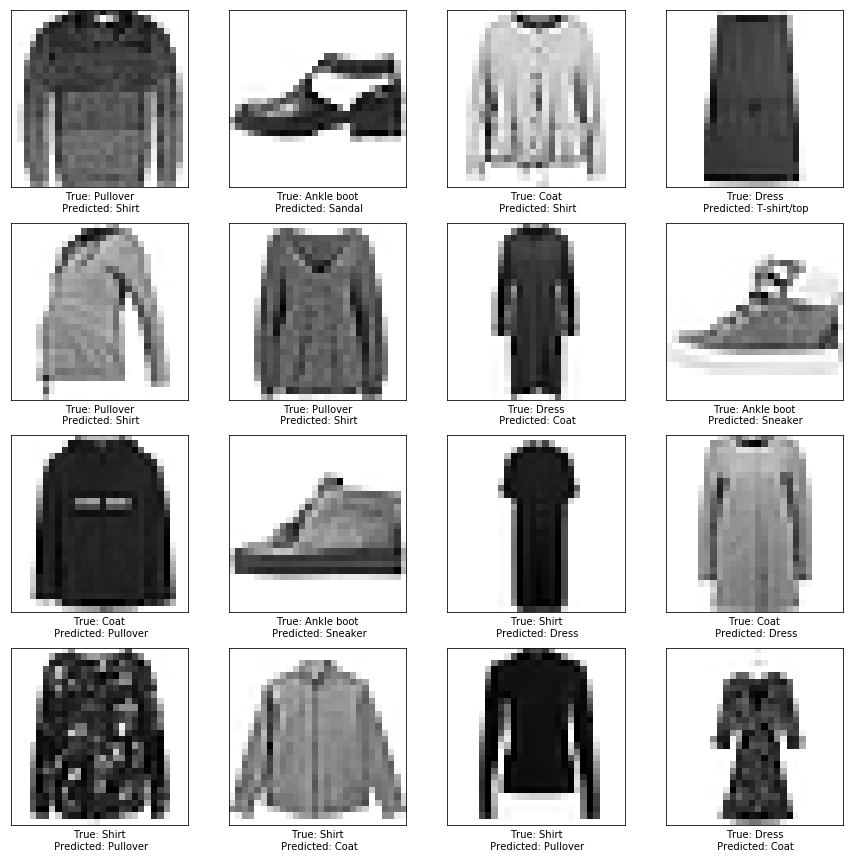

In [73]:
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[incorrect[i]], cmap=plt.cm.binary)
    plt.xlabel('True: {}\n Predicted: {}'
               .format(label_names[y_test[incorrect[i]]], label_names[predicted_classes[incorrect[i]]]))
plt.show()